## IMPORTING REQUEST AND LIBARIES

In [1]:
import requests
import pandas as pd
import numpy as np
import re

## UPGRADING PANDAS

In [2]:
pip install --upgrade pandas

## SETTING UP HEADER

In [3]:
header  = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

## BEAUTIFUL SOUP

In [4]:
from bs4 import BeautifulSoup

## CREATING EMPTY LIST TO STORE THE DATA AND LOOPING PAGES AND EXCTRACTING DATA 

In [5]:
YEAR = []
BRAND_NAME = []
SPEC = []
PRICE = []
KMS_INFO = []
TYPE = []
LOCATION = []

for i in range(1,21):
    url=f"https://www.cartrade.com/second-hand/hyderabad/page-{i}/#so=-1&sc=-1&city=105"
    page = requests.get(url)
    
    brand_name = BeautifulSoup(page.text)
    for i in brand_name.find_all(class_="cardTitle font-muli"):
        print(i.text)
        br = re.findall("\d (\w+)",i.text)
        BRAND_NAME.append(br[0])


    year = BeautifulSoup(page.text)
    for i in year.find_all(class_="cardTitle font-muli"):
        print(i.text)
        yr = re.findall("\s(\d+ )",i.text)
        YEAR.append(yr[0])


    spec = BeautifulSoup(page.text)
    for i in spec.find_all(class_="cardTitle font-muli"):
        print(i.text)
        sp = re.findall("\d \w+(.+)",i.text)
        SPEC.append(sp[0])
    
    price = BeautifulSoup(page.text)
    for i in price.find_all("div" ,class_=  "cr_prc"):
        print(i.text)
        P = re.findall("₹.+\d", i.text)
        if P :
            PRICE.append(P[0])
        else:
            PRICE.append(np.nan)


    kms = BeautifulSoup(page.text)
    for i in kms.find_all("span" ,class_=  "carInfo"):
        print(i.text)
        i = re.findall("\d.+KMs", i.text)
        KMS_INFO.append(i[0])


    type = BeautifulSoup(page.text)
    for i in type.find_all("span" ,class_=  "carInfo"):
        print(i.text)
        t = re.findall("Petrol|Diesel|Hybrid|Petrol + 1|CNG + 1", i.text)
        TYPE.append(t)


    location = BeautifulSoup(page.text)
    for i in location.find_all(class_="carInfo"):
        print(i.text)
        lo = re.findall("\|.+\n\t+.+\n\t+\s\|\s\n\t+(.+)",i.text)
        LOCATION.append(lo[0])


												2021 BMW 2 Series Gran Coupe Black Shadow Edition
											

												2016 Honda City VX CVT
											

												2022 Mercedes-Benz GLS 400d 4MATIC [2020-2023]
											

												2025 Kia Syros HTX Plus 1.0 Turbo 7DCT
											

												2015 Honda CR-V 2.4 AT
											

												2024 Tata Nexon EV Empowered Plus Long Range
											

												2024 Volkswagen Virtus GT Plus 1.5 TSI EVO DSG
											

												2015 Skoda Rapid 1.5 TDI CR Ambition with Alloy Wheels
											

												2023 BMW X7 xDrive40i M Sport (Petrol)
											

												2022 Volkswagen Polo Comfortline 1.0L TSI AT
											

												2022 Maruti Suzuki Wagon R VXI 1.0 CNG [2022-2023]
											

												2022 Maruti Suzuki Swift VXi AMT [2021-2023]
											

												2021 Hyundai Creta SX 1.5 Petrol [2020-2022]
											

												2022 Mahindra XUV700 AX 5 Diesel AT 5 STR [2021]
											

												2022 Hyundai Verna SX (O) 1.0 Turb

## CREATING SAME LENGTH IN DATA

In [6]:
KMS_INFO = KMS_INFO[:488]
YEAR = YEAR[:488]
BRAND_NAME = BRAND_NAME[:488]
SPEC = SPEC[:488]
PRICE = PRICE[:488]
TYPE = TYPE[:488]
LOCATION = LOCATION[:488]

## CREATING DATA FRAME

In [7]:
CARS = {"YEAR" : YEAR , "BRAND_NAME" : BRAND_NAME , "SPEC" : SPEC , "PRICE" : PRICE , "KMS_INFO" : KMS_INFO, "TYPE" : TYPE , "LOCATION" : LOCATION}

In [8]:
DF = pd.DataFrame(CARS)

## CLEANING THE DATA

In [9]:
DF["TYPE"] = DF["TYPE"].str[0]

In [10]:
DF["KMS_INFO"] = DF["KMS_INFO"].str.replace("KMs", "",regex=False)
DF["PRICE"] = DF["PRICE"].str.replace("₹", "",regex=False)

In [11]:
DF["KMS_INFO"] = DF["KMS_INFO"].str.replace(",", "",regex=False).astype(int)
DF["PRICE"] = DF["PRICE"].str.replace(",", "",regex= False).astype(int)
DF["YEAR"] = DF["YEAR"].astype(int)

## DISPLAYING THE DATA FRAME

In [12]:
DF

,YEAR,BRAND_NAME,SPEC,PRICE,KMS_INFO,TYPE,LOCATION
0,2021,BMW,2 Series Gran Coupe Black Shadow Edition,750000,6400,Diesel,"Banjara Hills Hyderabad, Hyderabad"
1,2016,Honda,City VX CVT,11500000,63601,Petrol,"Madhapur, Hyderabad"
2,2022,Mercedes,-Benz GLS 400d 4MATIC [2020-2023],1649000,12500,Diesel,"Jubilee Hills, Hyderabad"
3,2025,Kia,Syros HTX Plus 1.0 Turbo 7DCT,1095000,2604,Petrol,"Habsiguda, Hyderabad"
4,2015,Honda,CR-V 2.4 AT,1699999,67518,Petrol,"Madhapur, Hyderabad"
...,...,...,...,...,...,...,...
483,2018,Audi,A5 Sportback 40 TDI,1895000,44788,Diesel,"Madhapur, Hyderabad"
484,2018,Audi,A6 35 TDI Matrix,15000000,80000,Diesel,"Banjara Hills Hyderabad, Hyderabad"
485,2023,Land,Rover Range Rover Sport HSE 3.0 Diesel,1495000,30000,Diesel,"Banjara Hills Hyderabad, Hyderabad"
486,2022,MG,Hector Plus Sharp 1.5 DCT Petrol,3345000,32100,Petrol,"Banjara Hills Hyderabad, Hyderabad"


In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        488 non-null    int64 
 1   BRAND_NAME  488 non-null    object
 2   SPEC        488 non-null    object
 3   PRICE       488 non-null    int64 
 4   KMS_INFO    488 non-null    int64 
 5   TYPE        477 non-null    object
 6   LOCATION    488 non-null    object
dtypes: int64(3), object(4)
memory usage: 26.8+ KB


## EXPORTING TO CSV 

In [14]:
DF.to_csv(r"C:\Users\akarv\Documents\output.csv", index=False)

## IMPORTING MATPLOT AND SEABORN

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## UNIVARIATE ANALYSIS

#### HISTOGRAM FOR NUMERICAL DATA

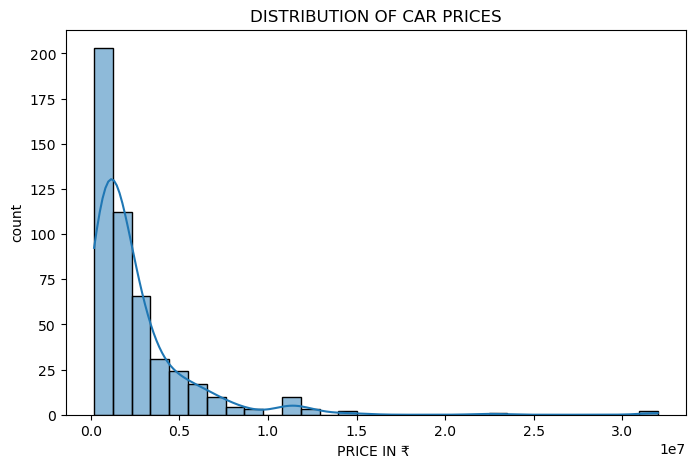

In [16]:
plt.figure(figsize= (8,5))
sns.histplot(DF['PRICE'], bins=30, kde=True)
plt.title("DISTRIBUTION OF CAR PRICES")
plt.xlabel("PRICE IN ₹ ")
plt.ylabel("count")
plt.show()

#### BOXPLOT FOR OUTLIERS

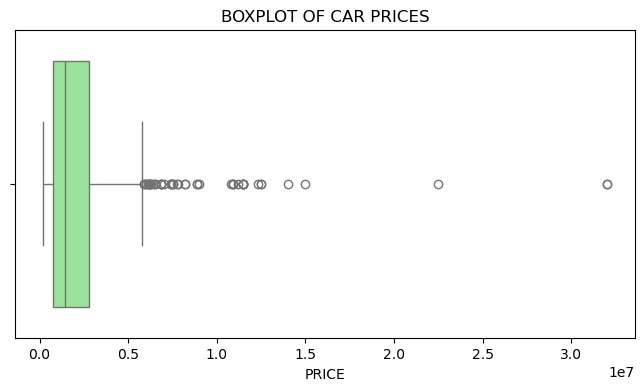

In [17]:
plt.figure(figsize= (8,4))
sns.boxplot(x= DF["PRICE"], color= "lightgreen")
plt.title("BOXPLOT OF CAR PRICES")
plt.xlabel("PRICE")
plt.show()


#### COUNTPLOT FOR CATEGORICAL DATA

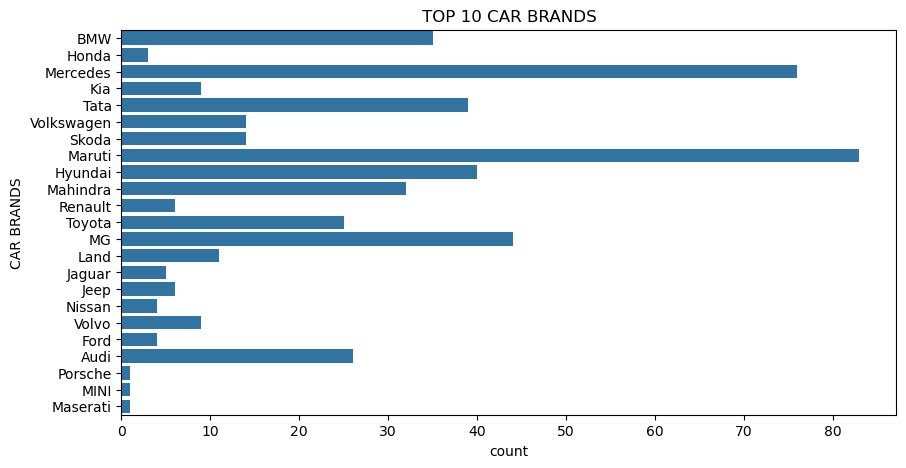

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y=DF["BRAND_NAME"])
plt.title("TOP 10 CAR BRANDS")
plt.ylabel("CAR BRANDS")
plt.show()

#### COUNTPLOT FOR FUEL TYPE

C:\Users\akarv\AppData\Local\Temp\ipykernel_5000\3815294890.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "TYPE" , data= DF, palette= "pastel")


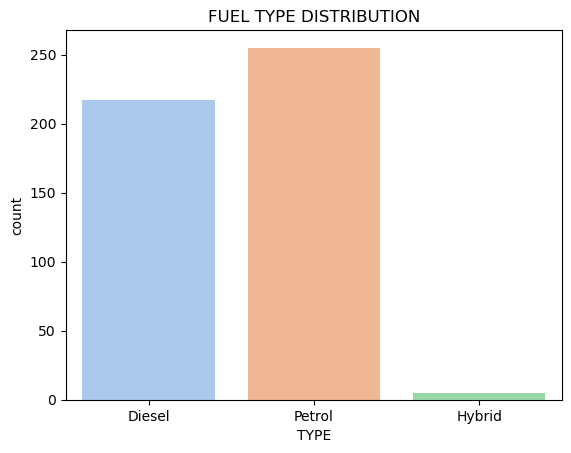

In [19]:
sns.countplot(x= "TYPE" , data= DF, palette= "pastel")
plt.title("FUEL TYPE DISTRIBUTION")
plt.show()

#### HISTPLOT FOR KMS

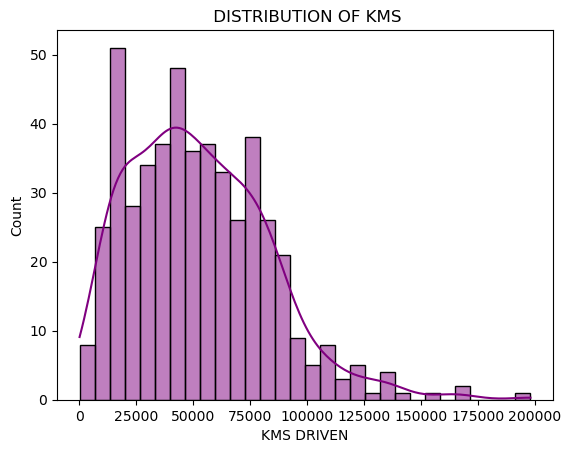

In [20]:
sns.histplot(DF["KMS_INFO"], bins= 30, kde= True , color= "purple")
plt.title(" DISTRIBUTION OF KMS")
plt.xlabel("KMS DRIVEN")
plt.show()

## BIVARIATE ANALYSIS

#### RELATIONSHIP CHARTS

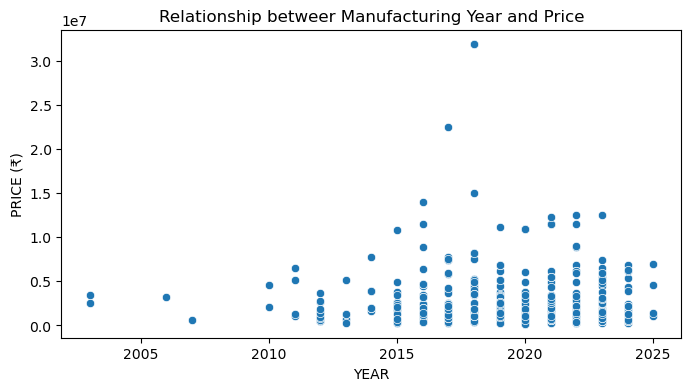

In [24]:
# SCATTERPLOT FOR YEAR AND PRICE

plt.figure(figsize=(8,4) )
sns.scatterplot(x='YEAR', y='PRICE', data=DF)
plt.title('Relationship betweer Manufacturing Year and Price') 
plt.xlabel('YEAR') 
plt.ylabel('PRICE (₹)' )
plt.show()



#### SCATTERPLOT FOR PRICE AND KMS

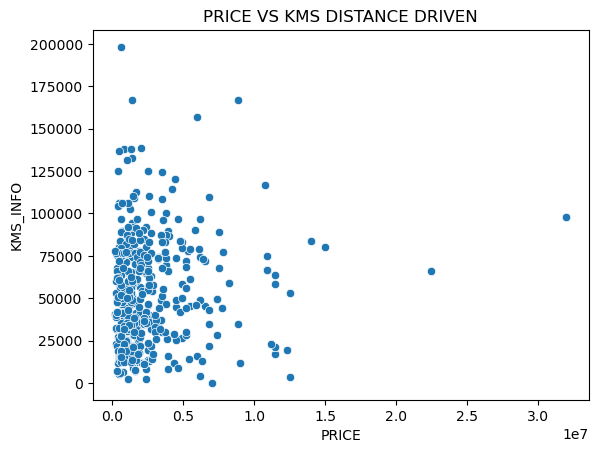

In [21]:
sns.scatterplot(y= DF["KMS_INFO"] , x= DF["PRICE"])
plt.title( "PRICE VS KMS DISTANCE DRIVEN")
plt.show()

#### BOXPLOT FOR TYPE AND PRICE

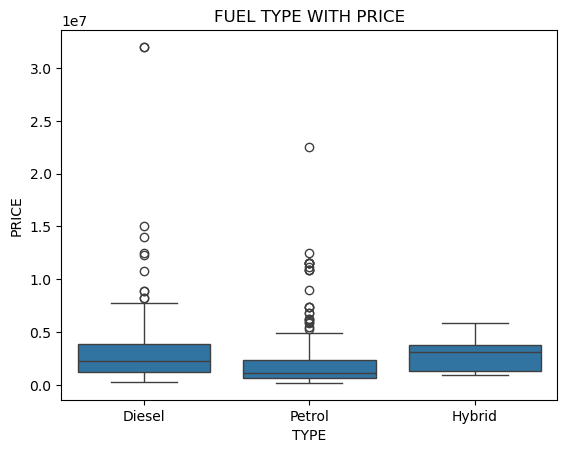

In [22]:
sns.boxplot(x= DF["TYPE"] , y= DF["PRICE"])
plt.title("FUEL TYPE WITH PRICE")
plt.show()


#### SCATTERPLOT FOR YEAR AND KMS


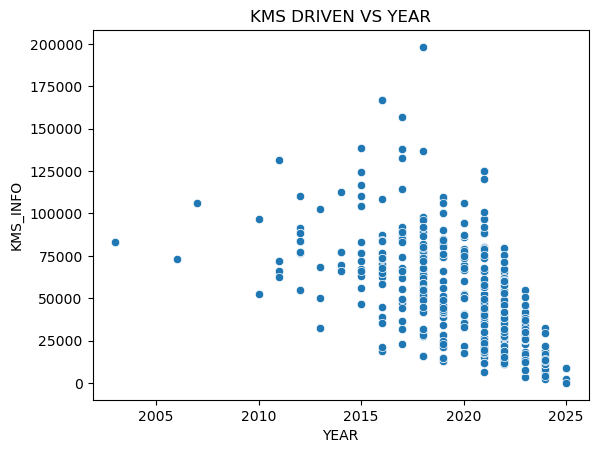

In [23]:
sns.scatterplot(x= DF["YEAR"] , y= DF["KMS_INFO"])
plt.title("KMS DRIVEN VS YEAR")
plt.show()

#### BARPLOT FOR AVG PRICE OF BRAND

C:\Users\akarv\AppData\Local\Temp\ipykernel_5000\3340740536.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= DF, x= "BRAND_NAME" ,  y="PRICE", estimator= "mean" ,ci= None)


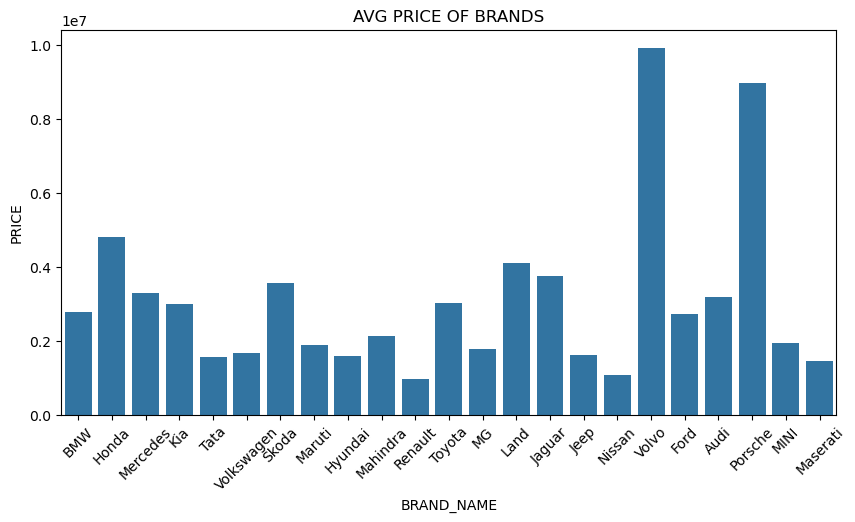

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data= DF, x= "BRAND_NAME" ,  y="PRICE", estimator= "mean" ,ci= None)
plt.xticks(rotation=45)
plt.title("AVG PRICE OF BRANDS") 
plt.show()

## CORRELATION HEATMAP

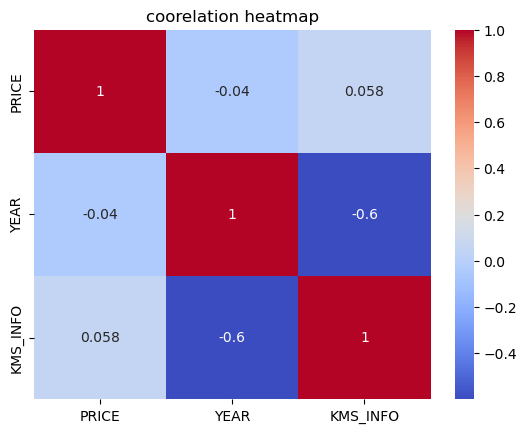

In [20]:
sns.heatmap(DF[["PRICE", "YEAR", "KMS_INFO"]].corr(),annot=True,cmap="coolwarm")
plt.title("coorelation heatmap")
plt.show()

### CATPLOT ON BRAND AND LOCATION

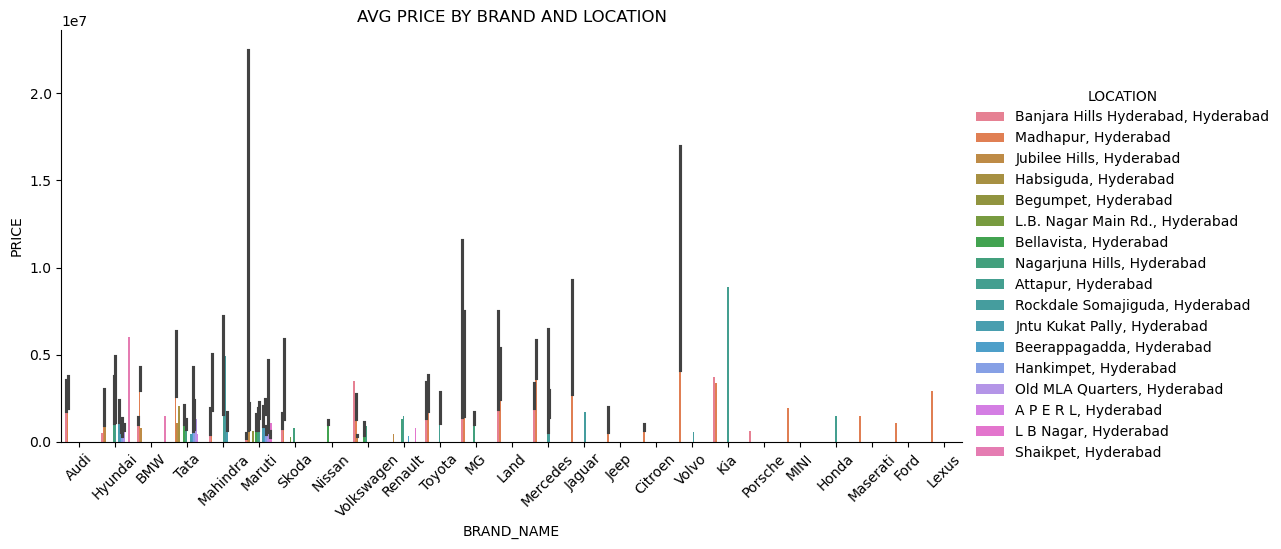

In [25]:
sns.catplot(data= DF, x= "BRAND_NAME" , y= "PRICE" , hue= "LOCATION" , kind= "bar" , height= 5, aspect= 2)
plt.title("AVG PRICE BY BRAND AND LOCATION")
plt.xticks(rotation=45)
plt.show()


#### PAIRPLOT

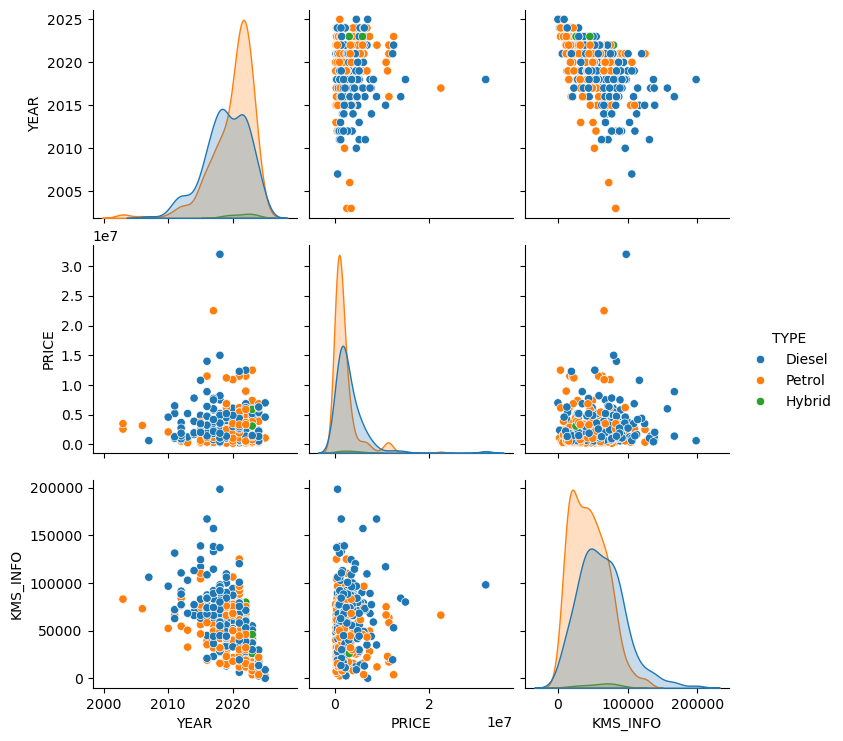

In [33]:
sns.pairplot(data= DF , hue= "TYPE" , vars= ["YEAR" , "PRICE" , "KMS_INFO"])

#### BOX PLOT OF PRICE DISTRIBUTION OF LOCATION

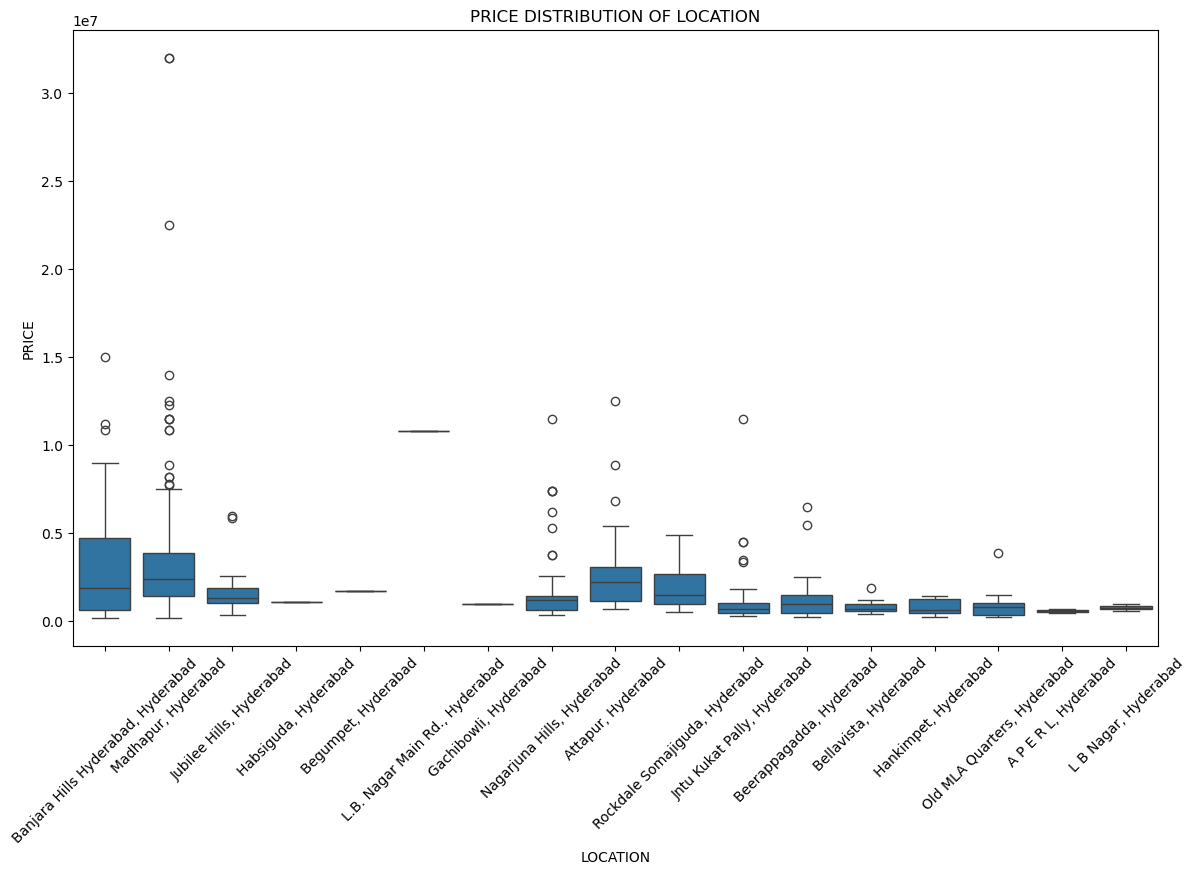

In [41]:
plt.figure(figsize=(14,8))
sns.boxplot(data= DF , x= "LOCATION" , y= "PRICE")
plt.xticks(rotation= 45)
plt.title("PRICE DISTRIBUTION OF LOCATION")
plt.show()


## PIVOT TABLE

In [31]:
pivot_df = pd.pivot_table(DF, values= "PRICE" , index= "BRAND_NAME" , columns= "TYPE", aggfunc= "mean" , fill_value= 0)
print(pivot_df)

TYPE              Diesel      Hybrid        Petrol
BRAND_NAME                                        
Audi        2.850909e+06         0.0  2.447222e+06
BMW         3.493144e+06         0.0  2.600000e+06
Citroen     8.450000e+05         0.0  0.000000e+00
Ford        1.100000e+06         0.0  0.000000e+00
Honda       0.000000e+00         0.0  1.500000e+06
Hyundai     1.109081e+06         0.0  1.909126e+06
Jaguar      5.217833e+06         0.0  0.000000e+00
Jeep        1.286420e+06         0.0  7.130000e+05
Kia         6.142188e+06         0.0  3.695000e+06
Land        3.426708e+06         0.0  8.200000e+06
Lexus       0.000000e+00         0.0  2.895000e+06
MG          1.890436e+06   1797199.8  1.917478e+06
MINI        1.950000e+06         0.0  0.000000e+00
Mahindra    2.821452e+06         0.0  2.501222e+06
Maruti      1.327500e+06         0.0  1.578476e+06
Maserati    1.450000e+06         0.0  0.000000e+00
Mercedes    3.599170e+06  12950000.0  5.198556e+06
Nissan      0.000000e+00       

## CROSS TABLE

In [32]:
cross_df = pd.crosstab(DF["BRAND_NAME"] , DF["TYPE"])
print(cross_df)

TYPE        Diesel  Hybrid  Petrol
BRAND_NAME                        
Audi            22       0       9
BMW             37       0       5
Citroen          2       0       0
Ford             1       0       0
Honda            0       0       1
Hyundai          4       0      24
Jaguar           6       0       0
Jeep             5       0       1
Kia              2       0       1
Land            12       0       2
Lexus            0       0       1
MG              13       5      23
MINI             1       0       0
Mahindra        26       0       9
Maruti           2       0      77
Maserati         1       0       0
Mercedes        60       1      18
Nissan           0       0       2
Porsche          0       0       1
Renault          0       0       7
Skoda            4       0       7
Tata             9       0      27
Toyota          20       2       4
Volkswagen       2       0      13
Volvo           12       0       0


## COMBINED INSIGHTS

In [35]:
combined_df = DF.groupby(["BRAND_NAME" , "TYPE"]).agg(AVG_PRICE = ("PRICE" , "mean"), COUNT= ("PRICE" , "count"),AVG_KMS = ("KMS_INFO", "mean")).reset_index()
print(combined_df)

    BRAND_NAME    TYPE     AVG_PRICE  COUNT        AVG_KMS
0         Audi  Diesel  2.850909e+06     22   85011.363636
1         Audi  Petrol  2.447222e+06      9   41582.000000
2          BMW  Diesel  3.493144e+06     37   77750.324324
3          BMW  Petrol  2.600000e+06      5   34080.800000
4      Citroen  Diesel  8.450000e+05      2   55000.000000
5         Ford  Diesel  1.100000e+06      1  100688.000000
6        Honda  Petrol  1.500000e+06      1   58400.000000
7      Hyundai  Diesel  1.109081e+06      4   66912.250000
8      Hyundai  Petrol  1.909126e+06     24   61667.708333
9       Jaguar  Diesel  5.217833e+06      6   55819.833333
10        Jeep  Diesel  1.286420e+06      5   44358.200000
11        Jeep  Petrol  7.130000e+05      1   22000.000000
12         Kia  Diesel  6.142188e+06      2   28385.000000
13         Kia  Petrol  3.695000e+06      1   19000.000000
14        Land  Diesel  3.426708e+06     12   60958.166667
15        Land  Petrol  8.200000e+06      2   37000.0000

## CONCLUSION

### EDA OF THE WEB SCRAPED DATA SET PROVIDED  VALUABLE INSIGHTS INTO PATTERNS, TRENDS , AND RELATIONALSHIPS WITH THE DATA. THROUGH DATA CLEANING AND TRANSFORMING AND VISUALIZATION WE IDENTIFIED THAT HIGHLIGHT THE VARIABLE AND BEHAVIOUR. VISUAL ANALYSIS USING CHARTS AND  GRAPHS MADE EASIER TO INTERPRET DATA DISTIBUTIONS DETECT OUTLIERS AND UNCOVERED CORRELATIONS THAT IS NOT DIRECTLY VISIBLE THROUGH THE RAW DATA.

### OVER ALL WEBSCRAPPING AND EDA PROVED EFFECTIVE FOR EXTRACTING THE DATA REAL WORLD INFOMATION AND TRANSFORMING IT INTO INSIGHTS. THIS PROCESS NOT ONLY DEMONSTRATED THE POWER OF AUTOMATED DATACOLLECTIONAND ALSO EMPHASIZED THE IMPORTANCE OF VISUALIZATION IN MAKING DATA DRIVEN DECISIONS. 

### FUTURE WORK COULD FOCUS ON EXPANDING THE DATA SET, APPLYING  MACHINE LEARNING MODELS FOR PREDICTION OR AUTOMATING THE DATA PIPELINE FOR REAL TIME ANALYSIS.